### Figure 1: Drawing a illustration graph on how the probability in each state chagnes

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as colors
import matplotlib.cm as cm

def plot_state_city(
    state,
    num_qubits,
    title="",
    figsize=None,
    color=None,
    alpha=1,
    ax=None,
    filename=None,
    special_state=None
):

    data = np.abs(state)
    num1 = num_qubits // 2
    num2 = num_qubits - num1
    # get the labels
    column_names = [bin(i)[2:].zfill(num1) for i in range(2**num1)]
    column_names = [r"$\left|{}\right\rangle$".format(i) for i in column_names]
    row_names = [bin(i)[2:].zfill(num2) for i in range(2**num2)]
    row_names = [r"$\left|{}\right\rangle$".format(i) for i in row_names]

    lx, ly = 2**num1, 2**num2
    xpos = np.arange(0, lx, 1)  # Set up a mesh of positions
    ypos = np.arange(0, ly, 1)
    xpos, ypos = np.meshgrid(xpos + 0.25, ypos + 0.25)

    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(lx * ly)

    dx = 0.5 * np.ones_like(zpos)  # width of bars
    dy = dx.copy()
    dz = data.flatten()

    color = color or [None, None]
    if len(color) != 2:
        raise ValueError("'color' must be a list of len=2.")
    color = [color[0] or "#648fff", color[1] or "#648fff"]

    if ax is None:
        fig = plt.figure(figsize=figsize or (15, 5))
        ax = fig.add_subplot(1, 1, 1, projection="3d")
    else:
        fig = ax.get_figure()

    offset = dz + np.abs(dz.min())
    fracs = offset.astype(float)/max(1, offset.max())
    fracs = fracs**2
    norm = colors.Normalize(fracs.min(), max(1, fracs.max()))
    color_values = cm.cool(norm(fracs.tolist()))
    if special_state is not None:
        special_state = [int(st, 2) for st in special_state]
        color_values[special_state] = cm.Wistia(norm(fracs[special_state].tolist()))

    for idx, cur_zpos in enumerate(zpos):
        if dz[idx] > 0:
            zorder = 2
        else:
            zorder = 0

        b1 = ax.bar3d(
            xpos[idx], ypos[idx], cur_zpos,
            dx[idx], dy[idx], dz[idx],
            alpha=alpha,
            zorder=zorder,
            color=color_values[idx]
        )
        # b1.set_facecolors(fc1[6 * idx : 6 * idx + 6])

    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    x = [xlim[0], xlim[1], xlim[1], xlim[0]]
    y = [ylim[0], ylim[0], ylim[1], ylim[1]]
    z = [0, 0, 0, 0]
    verts = [list(zip(x, y, z))]

    pc1 = Poly3DCollection(verts, alpha=0.15, facecolor="k", linewidths=1, zorder=1)

    if min(dz) < 0 < max(dz):
        ax.add_collection3d(pc1)
    ax.set_xticks(np.arange(0.25, lx + 0.25, 2))
    ax.set_yticks(np.arange(0.75, ly + 0.75, 2))

    min_dz = np.min(dz)
    max_dz = np.max(dz)
    ax.axes.set_zlim3d(0, 1)

    ax.get_autoscalez_on()
    ax.xaxis.set_ticklabels(row_names[::2], fontsize=10, rotation=45, ha="right", va="top")
    ax.yaxis.set_ticklabels(column_names[::2], fontsize=10, rotation=-22.5, ha="left", va="center")

    ax.set_xlabel(f"\n\n\n\nFirst {num1} qubits", fontsize=12)
    ax.set_ylabel(f"\n\n\n\nlast {num2} qubits", fontsize=12)
    ax.set_zlabel("Probability", fontsize=14)

    for tick in ax.zaxis.get_major_ticks():
        tick.label1.set_fontsize(10)

    fig.suptitle(title, fontsize=16)

    if filename is None:
        return fig
    else:
        return fig.savefig(filename)


In [2]:
from generate_eq import generate_simple_eqs
import numpy as np
np.random.seed(43)
n = 8
num_sol = 3
sol, eqs = generate_simple_eqs(n, num_sol)
num_sol = len(sol)
print(sol)
print(eqs)

[125, 148, 242]
[array([34,  2, 17, 40, 96, 24, 80, 68,  6,  8,  3, 65]), array([132, 192,  36,  64,   0,   6,  32,  10,  12,  20,  18, 136,  68,
         4, 130, 129]), array([ 16,   2,   8, 132,  72, 129, 160,  96,   6,  65,  80,  64,  32,
        34,  24,   0,  66,  18, 128,  10]), array([ 34,   5,  16,  72,   1,   6,  40, 129,  96,  10,  12,  17, 130,
         9,  20,  68,  36]), array([ 96,   4,  24,   8, 129, 160,  32,  66,  72,   5,   6,   3,  16,
       192, 136]), array([ 34,  33,  32,  24, 130,  65, 160,  66,  40,  48,  18,  80,  12,
         8,   1, 129, 132, 128,   3,  64,  17,   5,  72])]


In [3]:
from utils import eqs_to_str
from generate_eq import find_solution_brute_force
import numpy as np

print(eqs_to_str(eqs, n))
solutions = [bin(i)[2:].zfill(n)[::-1] for i in find_solution_brute_force(eqs, n)]
sols = [int(sol, 2) for sol in solutions]
print(solutions)

Equations: 
x2x3 + x2x4 + x2x6 + x2x8 + x3x5 + x3x7 + x4x5 + x4x8 + x5   + x6x7 + x7x8 + x7   = 0
x1x2 + x1x5 + x1x6 + x1x7 + x1x8 + x2x6 + x2   + x3x6 + x3   + x4x6 + x4x7 + x5x6 + x5x7 + x6x7 + x6   + 1 = 0
x1x3 + x1x6 + x1x8 + x1   + x2x3 + x2x4 + x2x5 + x2x7 + x2x8 + x2   + x3x7 + x3   + x4x5 + x4x7 + x4   + x5x7 + x5   + x6x7 + x7   + 1 = 0
x1x7 + x1x8 + x2x3 + x2x5 + x2x6 + x3x5 + x3x6 + x3x7 + x4x6 + x4x8 + x4   + x5x6 + x5x7 + x5x8 + x6x7 + x6x8 + x8   = 0
x1x2 + x1x3 + x1x5 + x1x8 + x2x3 + x2x5 + x2x7 + x3   + x4x5 + x4   + x5   + x6x7 + x6x8 + x6   + x7x8 = 0
x1x3 + x1x6 + x1x7 + x1x8 + x1   + x2x4 + x2x5 + x2x7 + x2x8 + x2   + x3x4 + x3x5 + x3x7 + x3x8 + x3   + x4x5 + x4x7 + x4x8 + x5x6 + x5   + x6x8 + x7x8 + x8   = 0

['10111110', '00101001', '01001111']


In [4]:
# Construct quantum circuit without measure
from qiskit import assemble, transpile, QuantumCircuit
from qiskit_aer import StatevectorSimulator
# from qiskit.tools.visualization import plot_histogram, plot_state_city
from matplotlib import pyplot as plt
from generate_qc import grover_circuit
from circuit_component import generate_oracle

level = 1
split = 1.6
probs = []
for i in range(22):
    np.random.seed(42)
    circ, iterations = grover_circuit(eqs, n, level, num_sol, 3, split, iterations=i)
    for _ in range(n):
        circ.data.pop()  # remove measurement

    # Transpile for simulator
    simulator = StatevectorSimulator()
    circ = transpile(circ, simulator)

    # Run and get statevector
    result = simulator.run(circ, shots=1024).result()
    statevector = result.get_statevector(circ)
    probs.append((np.abs(statevector)[sols] ** 2).sum())
    print(f"success prob after {i} iterations: {probs[i]}")

2024-03-04 13:35:23,840 - generate_qc.py[line:34] - WARNING: **USING GPU SIMULATOR**
2024-03-04 13:35:23,843 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:23,844 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:23,845 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 0
2024-03-04 13:35:23,846 - generate_qc.py[line:86] - INFO: actual grover ops count: 0
INFO:BQE Solver:actual grover ops count: 0
2024-03-04 13:35:23,899 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:23,900 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:23,901 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 1

success prob after 0 iterations: 0.011718749999999997
success prob after 1 iterations: 0.09167003631591795


2024-03-04 13:35:24,138 - circuit_component.py[line:86] - DEBUG: part 0-1 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 0-1 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:24,139 - generate_qc.py[line:86] - INFO: actual grover ops count: 2
INFO:BQE Solver:actual grover ops count: 2
2024-03-04 13:35:24,372 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:24,373 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:24,375 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 3
2024-03-04 13:35:24,377 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:35:24,378 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-03-

success prob after 2 iterations: 0.21675843000411982


2024-03-04 13:35:24,769 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:24,771 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:24,773 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 4
2024-03-04 13:35:24,774 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:35:24,776 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-03-04 13:35:24,807 - circuit_component.py[line:86] - DEBUG: part 0-0 using eqs: [0, 1, 5, 2]
DEBUG:BQE Solver:part 0-0 using eqs: [0, 1, 5, 2]
2024-03-04 13:35:24,831 - circuit_component.py[line:86] - DEBUG: part 0-1 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 0-1 using eqs: [

success prob after 3 iterations: 0.39491434236697365


2024-03-04 13:35:25,391 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:25,393 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:25,395 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 5
2024-03-04 13:35:25,396 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:35:25,398 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-03-04 13:35:25,400 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [3, 0, 2, 5, 4, 1]
DEBUG:BQE Solver:shuffled index seq: [3, 0, 2, 5, 4, 1]
2024-03-04 13:35:25,435 - circuit_component.py[line:86] - DEBUG: part 0-0 using eqs: [0, 1, 5, 2]
DEBUG:BQE Solver:part 0-0

success prob after 4 iterations: 0.5783027648619731


2024-03-04 13:35:26,090 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:26,091 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:26,093 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 6
2024-03-04 13:35:26,094 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:35:26,096 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-03-04 13:35:26,098 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [3, 0, 2, 5, 4, 1]
DEBUG:BQE Solver:shuffled index seq: [3, 0, 2, 5, 4, 1]
2024-03-04 13:35:26,137 - circuit_component.py[line:86] - DEBUG: part 0-0 using eqs: [0, 1, 5, 2]
DEBUG:BQE Solver:part 0-0

success prob after 5 iterations: 0.688378381217749


2024-03-04 13:35:26,939 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:26,941 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:26,942 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 7
2024-03-04 13:35:26,944 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:35:26,947 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-03-04 13:35:26,949 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [3, 0, 2, 5, 4, 1]
DEBUG:BQE Solver:shuffled index seq: [3, 0, 2, 5, 4, 1]
2024-03-04 13:35:26,951 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [3, 1, 5, 0, 4, 2]
DEBUG:BQE Solver:s

success prob after 6 iterations: 0.7379944423919143


DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:27,157 - generate_qc.py[line:86] - INFO: actual grover ops count: 7
INFO:BQE Solver:actual grover ops count: 7
2024-03-04 13:35:27,815 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:27,817 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:27,818 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 8
2024-03-04 13:35:27,820 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:35:27,822 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-03-04 13:35:27,824 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [3, 0, 2, 5, 4, 1]
D

success prob after 7 iterations: 0.7263828334630438


DEBUG:BQE Solver:part 2-0 using eqs: [3, 0, 2, 5]
2024-03-04 13:35:28,037 - circuit_component.py[line:86] - DEBUG: part 2-1 using eqs: [2, 5, 4, 1]
DEBUG:BQE Solver:part 2-1 using eqs: [2, 5, 4, 1]
2024-03-04 13:35:28,057 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:28,092 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:28,094 - generate_qc.py[line:86] - INFO: actual grover ops count: 8
INFO:BQE Solver:actual grover ops count: 8
2024-03-04 13:35:28,838 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:28,839 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:28,841 - generate_qc.py[line:82] - WARNING: using predetermin

success prob after 8 iterations: 0.6184049753071723


DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:29,069 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:29,070 - generate_qc.py[line:86] - INFO: actual grover ops count: 9
INFO:BQE Solver:actual grover ops count: 9
2024-03-04 13:35:29,976 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:29,978 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:29,980 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 10
2024-03-04 13:35:29,981 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:35:29,983 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Sol

success prob after 9 iterations: 0.4331723931713839


2024-03-04 13:35:30,199 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:30,201 - generate_qc.py[line:86] - INFO: actual grover ops count: 10
INFO:BQE Solver:actual grover ops count: 10
2024-03-04 13:35:31,177 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:31,179 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:35:31,180 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 11
2024-03-04 13:35:31,182 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:35:31,184 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-

success prob after 10 iterations: 0.2579795348295576


DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:31,398 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:31,418 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:31,436 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:31,473 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:31,474 - generate_qc.py[line:86] - INFO: actual grover ops count: 11
INFO:BQE Solver:actual grover ops count: 11
2024-03-04 13:35:32,540 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:35:32,542 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
I

success prob after 11 iterations: 0.11019211991875914


2024-03-04 13:35:32,758 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:32,793 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:32,820 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:32,844 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:32,881 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:32,927 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:32,929 - generate_qc.py[line:86] - INFO: actual grover ops count: 12
INFO:BQE Solver:actual gro

success prob after 12 iterations: 0.022623935995907597


DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:34,307 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:34,327 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:34,345 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:34,366 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:34,386 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:34,415 - circuit_component.py[line:86] - DEBUG: part 6-0 using eqs: [1, 3, 4, 0]
DEBUG:BQE Solver:part 6-0 using eqs: [1, 3, 4, 0]
2024-03-04 13:35:34,417 - generate_qc.py[line:86] - INFO: actu

success prob after 13 iterations: 3.930360043605194e-05


DEBUG:BQE Solver:part 2-1 using eqs: [2, 5, 4, 1]
2024-03-04 13:35:35,977 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:35,996 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:36,016 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:36,035 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:36,055 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:36,075 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:36,092 - circuit_component.py[line:86] - DEBU

success prob after 14 iterations: 0.024862717652830886


2024-03-04 13:35:37,664 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:37,685 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:37,706 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:37,723 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:37,743 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:37,765 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:37,782 - circuit_component.py[line:86] - DEBUG: part 6-0 using eqs: [1, 3, 4, 0]
DEBUG:BQE Solv

success prob after 15 iterations: 0.10604198776924176


2024-03-04 13:35:39,509 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:39,529 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:39,550 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:39,568 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:39,588 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:39,608 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:39,626 - circuit_component.py[line:86] - DEBUG: part 6-0 using eqs: [1, 3, 4, 0]
DEBUG:BQE Solv

success prob after 16 iterations: 0.23110134550587108


DEBUG:BQE Solver:part 2-1 using eqs: [2, 5, 4, 1]
2024-03-04 13:35:41,489 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:41,510 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:41,530 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:41,547 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:41,567 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:41,588 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:41,605 - circuit_component.py[line:86] - DEBU

success prob after 17 iterations: 0.34949335974466045


DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:43,525 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:43,547 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:43,565 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:43,585 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:43,605 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:43,624 - circuit_component.py[line:86] - DEBUG: part 6-0 using eqs: [1, 3, 4, 0]
DEBUG:BQE Solver:part 6-0 using eqs: [1, 3, 4, 0]
2024-03-04 13:35:43,710 - circuit_component.py[line:86] - DEBU

success prob after 18 iterations: 0.46036335938045114


DEBUG:BQE Solver:part 2-1 using eqs: [2, 5, 4, 1]
2024-03-04 13:35:45,753 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:45,772 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:45,792 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:45,811 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:45,831 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:45,851 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:45,868 - circuit_component.py[line:86] - DEBU

success prob after 19 iterations: 0.4982489242311979


2024-03-04 13:35:48,066 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:48,087 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:48,108 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:48,125 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:48,145 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:48,166 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:48,183 - circuit_component.py[line:86] - DEBUG: part 6-0 using eqs: [1, 3, 4, 0]
DEBUG:BQE Solv

success prob after 20 iterations: 0.4936894084273227


DEBUG:BQE Solver:part 2-1 using eqs: [2, 5, 4, 1]
2024-03-04 13:35:50,514 - circuit_component.py[line:86] - DEBUG: part 3-0 using eqs: [3, 1, 5, 0]
DEBUG:BQE Solver:part 3-0 using eqs: [3, 1, 5, 0]
2024-03-04 13:35:50,535 - circuit_component.py[line:86] - DEBUG: part 3-1 using eqs: [5, 0, 4, 2]
DEBUG:BQE Solver:part 3-1 using eqs: [5, 0, 4, 2]
2024-03-04 13:35:50,556 - circuit_component.py[line:86] - DEBUG: part 4-0 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 4-0 using eqs: [5, 2, 4, 3]
2024-03-04 13:35:50,573 - circuit_component.py[line:86] - DEBUG: part 4-1 using eqs: [4, 3, 0, 1]
DEBUG:BQE Solver:part 4-1 using eqs: [4, 3, 0, 1]
2024-03-04 13:35:50,593 - circuit_component.py[line:86] - DEBUG: part 5-0 using eqs: [1, 4, 5, 3]
DEBUG:BQE Solver:part 5-0 using eqs: [1, 4, 5, 3]
2024-03-04 13:35:50,614 - circuit_component.py[line:86] - DEBUG: part 5-1 using eqs: [5, 3, 0, 2]
DEBUG:BQE Solver:part 5-1 using eqs: [5, 3, 0, 2]
2024-03-04 13:35:50,631 - circuit_component.py[line:86] - DEBU

success prob after 21 iterations: 0.4806469041990841


In [5]:
probs

[0.011718749999999997,
 0.09167003631591795,
 0.21675843000411982,
 0.39491434236697365,
 0.5783027648619731,
 0.688378381217749,
 0.7379944423919143,
 0.7263828334630438,
 0.6184049753071723,
 0.4331723931713839,
 0.2579795348295576,
 0.11019211991875914,
 0.022623935995907597,
 3.930360043605194e-05,
 0.024862717652830886,
 0.10604198776924176,
 0.23110134550587108,
 0.34949335974466045,
 0.46036335938045114,
 0.4982489242311979,
 0.4936894084273227,
 0.4806469041990841]

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def survey(probs, ax):
    category_names = ['Success', 'Failure']
    results = {}
    for i in range(len(probs)):
        text = f"{i} iters: "
        success = probs[i]
        fail = 1 - probs[i]
        results[text] = [success, fail]


    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)

    colors = ["#d4c117", "#00aeae"]
    custom_colormap = LinearSegmentedColormap.from_list("custom_map", colors)

    # Get the colors from the custom colormap
    category_colors = custom_colormap(np.linspace(0, 1, data.shape[1]))
    ax.invert_yaxis()
    # ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
        if colname == "Success":
            for rect, label in zip(rects, widths):
                ax.text(rect.get_width() + 0.01, rect.get_y() + rect.get_height() / 2,
                        f"{label:.3f}", va='center', ha='left', fontsize=10)

    ax.legend(bbox_to_anchor=(-0.1, 1),
              loc='lower left', fontsize=10)

    return ax



2024-03-04 13:27:07,421 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:27:07,423 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:27:07,424 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 0
2024-03-04 13:27:07,425 - generate_qc.py[line:86] - INFO: actual grover ops count: 0


INFO:BQE Solver:actual grover ops count: 0


0.011718750000000005


2024-03-04 13:27:07,993 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:27:07,994 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:27:07,995 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 2
2024-03-04 13:27:07,997 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:27:08,017 - circuit_component.py[line:86] - DEBUG: part 0-0 using eqs: [0, 1, 5, 2]
DEBUG:BQE Solver:part 0-0 using eqs: [0, 1, 5, 2]
2024-03-04 13:27:08,037 - circuit_component.py[line:86] - DEBUG: part 0-1 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 0-1 using eqs: [5, 2, 4, 3]
2024-03-04 13:27:08,038 - generate_qc.py[line:86] - INFO: actual grover ops count: 2
INFO:BQE Solver:actual grover ops count: 2


0.21675843000411987


2024-03-04 13:27:09,001 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:27:09,002 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:27:09,004 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 4
2024-03-04 13:27:09,005 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:27:09,006 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-03-04 13:27:09,025 - circuit_component.py[line:86] - DEBUG: part 0-0 using eqs: [0, 1, 5, 2]
DEBUG:BQE Solver:part 0-0 using eqs: [0, 1, 5, 2]
2024-03-04 13:27:09,045 - circuit_component.py[line:86] - DEBUG: part 0-1 using eqs: [5, 2, 4, 3]
DEBUG:BQE Solver:part 0-1 using eqs: [

0.5783027648619731


2024-03-04 13:27:10,032 - generate_qc.py[line:64] - INFO: using split = 1.6.
INFO:BQE Solver:using split = 1.6.
2024-03-04 13:27:10,034 - generate_qc.py[line:71] - INFO: determined ancilla usage: 4 qubits. Each part use 4 eqs.
INFO:BQE Solver:determined ancilla usage: 4 qubits. Each part use 4 eqs.
2024-03-04 13:27:10,035 - generate_qc.py[line:82] - WARNING: using predetermined iteration: 6
2024-03-04 13:27:10,037 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [0, 1, 5, 2, 4, 3]
DEBUG:BQE Solver:shuffled index seq: [0, 1, 5, 2, 4, 3]
2024-03-04 13:27:10,038 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [2, 0, 1, 5, 3, 4]
DEBUG:BQE Solver:shuffled index seq: [2, 0, 1, 5, 3, 4]
2024-03-04 13:27:10,040 - circuit_component.py[line:104] - DEBUG: shuffled index seq: [3, 0, 2, 5, 4, 1]
DEBUG:BQE Solver:shuffled index seq: [3, 0, 2, 5, 4, 1]
2024-03-04 13:27:10,059 - circuit_component.py[line:86] - DEBUG: part 0-0 using eqs: [0, 1, 5, 2]
DEBUG:BQE Solver:part 0-0

0.7379944423919143


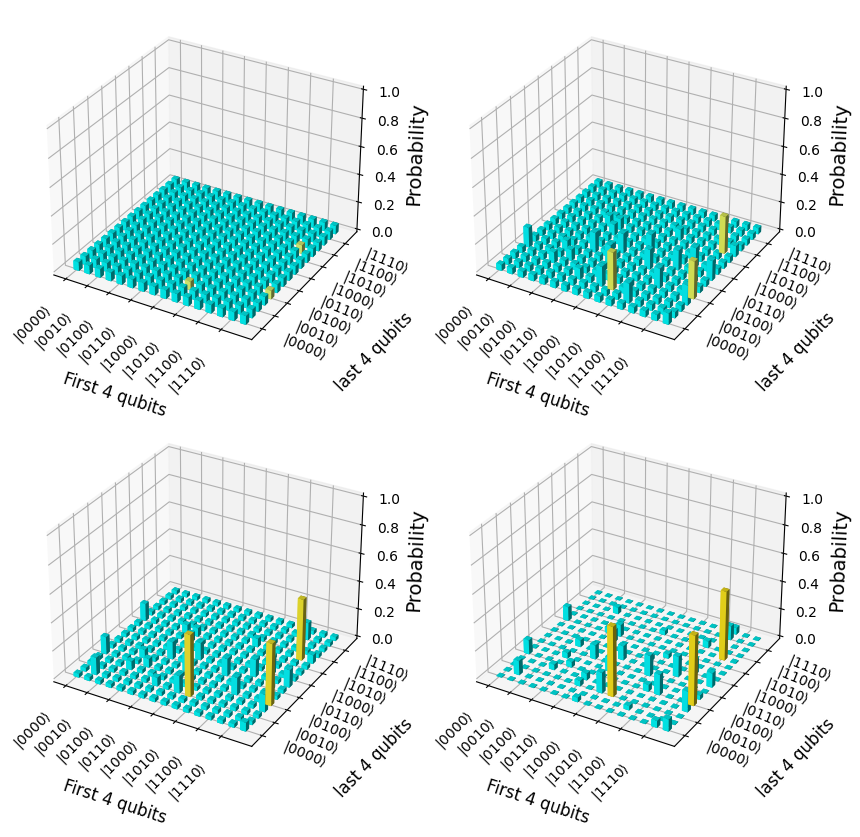

In [24]:
# Construct quantum circuit without measure
from qiskit import assemble, transpile, QuantumCircuit
from qiskit_aer import StatevectorSimulator
# from qiskit.tools.visualization import plot_histogram, plot_state_city
from matplotlib import pyplot as plt
from generate_qc import grover_circuit
from circuit_component import generate_oracle

import matplotlib.gridspec as gridspec

level = 1
split = 1.6
# gen = lambda x: generate_oracle(eqs=[eqs[j] for j in x], n=n, level=level, arrange=True)
fig = plt.figure(figsize=(10, 10))
# Define the grid layout
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], hspace=0.12)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0], projection='3d')  # First row, first column
ax2 = fig.add_subplot(gs[0, 1], projection='3d')  # First row, second column
ax3 = fig.add_subplot(gs[1, 0], projection='3d')  # Second row, first column
ax4 = fig.add_subplot(gs[1, 1], projection='3d')  # Second row, second column
axs = [ax1, ax2, ax3, ax4]

nrows, ncols = 2, 2
for i in range(4):
    np.random.seed(42)
    circ, iterations = grover_circuit(eqs, n, level, num_sol, 3, split, iterations=i*2)
    for _ in range(n):
        circ.data.pop()  # remove measurement

    # Transpile for simulator
    simulator = StatevectorSimulator()
    circ = transpile(circ, simulator)

    # Run and get statevector
    result = simulator.run(circ, shots=1024).result()
    statevector = result.get_statevector(circ)
    # print(circ.draw())
    print((np.abs(statevector) **2).max() * 3)
    # ax = fig.add_subplot(nrows, ncols, 1+i, projection='3d')
    plot_state_city(statevector, num_qubits=n, ax=axs[i], special_state=solutions)


plt.savefig("../figure/sample-run.eps")
plt.show()

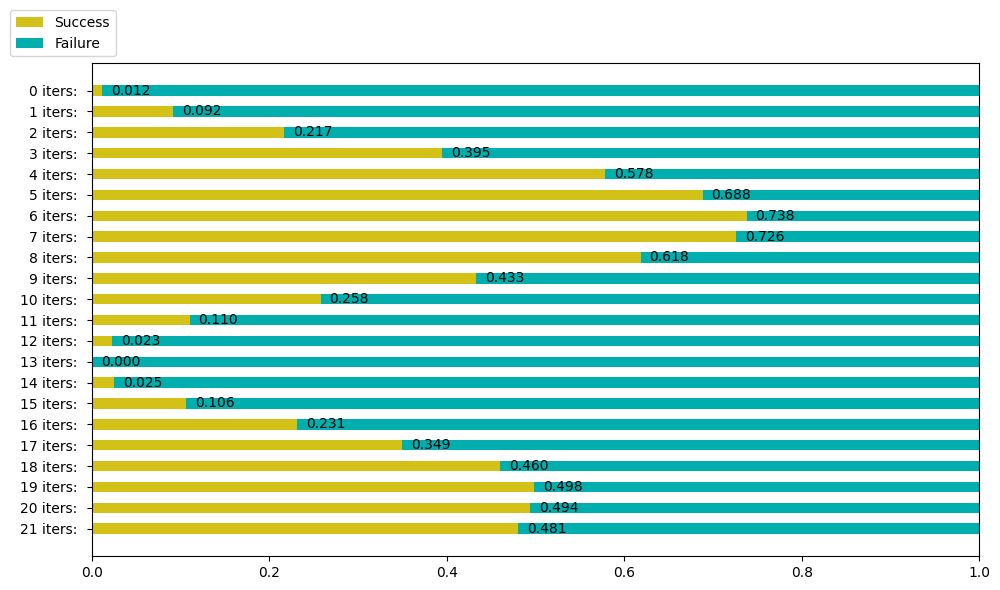

In [9]:
fig = plt.figure(figsize=(10, 6))
survey(probs, plt.gca())
plt.tight_layout()
plt.savefig("../figure/sample-run-bar.eps")
plt.show()

